In [2]:
# Initialize Otter
import otter
grader = otter.Notebook("hw5.ipynb")

# CPSC 330 - Applied Machine Learning 

## Homework 5: Putting it all together 
### Associated lectures: All material till lecture 13 

**Due date: Monday, October 28th, 2024 at 11:59pm**

## Table of contents
0. [Submission instructions](#si)
1. [Understanding the problem](#1)
2. [Data splitting](#2)
3. [EDA](#3)
4. [Feature engineering](#4)
5. [Preprocessing and transformations](#5) 
6. [Baseline model](#6)
7. [Linear models](#7)
8. [Different models](#8)
9. [Feature selection](#9)
10. [Hyperparameter optimization](#10)
11. [Interpretation and feature importances](#11) 
12. [Results on the test set](#12)
13. [Summary of the results](#13)
14. [Your takeaway from the course](#15)

<div class="alert alert-info">

# Final test score: 0.51 (f1 score)

## Submission instructions
<hr>
rubric={points:4}

**You may work with a partner on this homework and submit your assignment as a group.** Below are some instructions on working as a group.  
- The maximum group size is 2. 
- Use group work as an opportunity to collaborate and learn new things from each other. 
- Be respectful to each other and make sure you understand all the concepts in the assignment well. 
- It's your responsibility to make sure that the assignment is submitted by one of the group members before the deadline. 
- You can find the instructions on how to do group submission on Gradescope [here](https://help.gradescope.com/article/m5qz2xsnjy-student-add-group-members).
- If you would like to use late tokens for the homework, all group members must have the necessary late tokens available. Please note that the late tokens will be counted for all members of the group.   


Follow the [homework submission instructions](https://github.com/UBC-CS/cpsc330-2024W1/blob/master/docs/homework_instructions.md). 

1. Before submitting the assignment, run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from "1" will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
3. Follow the [CPSC 330 homework instructions](https://ubc-cs.github.io/cpsc330-2024W1/docs/homework_instructions.html), which include information on how to do your assignment and how to submit your assignment.
4. Upload your solution on Gradescope. Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission. 
5. Make sure that the plots and output are rendered properly in your submitted file. If the .ipynb file is too big and doesn't render on Gradescope, also upload a pdf or html in addition to the .ipynb so that the TAs can view your submission on Gradescope.


_Note: The assignments will get gradually more open-ended as we progress through the course. In many cases, there won't be a single correct solution. Sometimes you will have to make your own choices and your own decisions (for example, on what parameter values to use when they are not explicitly provided in the instructions). Use your own judgment in such cases and justify your choices, if necessary._

</div>

<!-- BEGIN QUESTION -->

## Imports

<div class="alert alert-warning">
    
Imports
    
</div>

_Points:_ 0

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# new added import
from sklearn.model_selection import cross_val_score, cross_validate, train_test_split
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import Ridge
from sklearn.linear_model import LogisticRegression



# Ali's imports
from sklearn.compose import ColumnTransformer, make_column_transformer, TransformedTargetRegressor
from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression, Ridge, RidgeCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer, mean_squared_error, r2_score
from sklearn.model_selection import (
    GridSearchCV,
    cross_val_score,
    cross_validate,
    train_test_split,
)

<!-- END QUESTION -->

## Introduction <a name="in"></a>

In this homework you will be working on an open-ended mini-project, where you will put all the different things you have learned so far together to solve an interesting problem.

A few notes and tips when you work on this mini-project: 

#### Tips
1. This mini-project is open-ended, and while working on it, there might be some situations where you'll have to use your own judgment and make your own decisions (as you would be doing when you work as a data scientist). Make sure you explain your decisions whenever necessary. 
2. **Do not include everything you ever tried in your submission** -- it's fine just to have your final code. That said, your code should be reproducible and well-documented. For example, if you chose your hyperparameters based on some hyperparameter optimization experiment, you should leave in the code for that experiment so that someone else could re-run it and obtain the same hyperparameters, rather than mysteriously just setting the hyperparameters to some (carefully chosen) values in your code. 
3. If you realize that you are repeating a lot of code try to organize it in functions. Clear presentation of your code, experiments, and results is the key to be successful in this lab. You may use code from lecture notes or previous lab solutions with appropriate attributions. 

#### Assessment
We plan to grade fairly and leniently. We don't have some secret target score that you need to achieve to get a good grade. **You'll be assessed on demonstration of mastery of course topics, clear presentation, and the quality of your analysis and results.** For example, if you just have a bunch of code and no text or figures, that's not good. If you do a bunch of sane things and get a lower accuracy than your friend, don't sweat it.


#### A final note
Finally, this style of this "project" question is different from other assignments. It'll be up to you to decide when you're "done" -- in fact, this is one of the hardest parts of real projects. But please don't spend WAY too much time on this... perhaps "a few hours" (15-20 hours???) is a good guideline for this project . Of course if you're having fun you're welcome to spend as much time as you want! But, if so, try not to do it out of perfectionism or getting the best possible grade. Do it because you're learning and enjoying it. Students from the past cohorts have found such kind of labs useful and fun and I hope you enjoy it as well. 

<br><br>

<!-- BEGIN QUESTION -->

## 1. Pick your problem and explain the prediction problem <a name="1"></a>
<hr>
rubric={points:3}

In this mini project, you have the option to choose on which dataset you will be working on. The tasks you will need to carry on will be similar, independently of your choice.

### Option 1
You can choose to work on a classification problem of predicting whether a credit card client will default or not. 
For this problem, you will use [Default of Credit Card Clients Dataset](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset). In this data set, there are 30,000 examples and 24 features, and the goal is to estimate whether a person will default (fail to pay) their credit card bills; this column is labeled "default.payment.next.month" in the data. The rest of the columns can be used as features. You may take some ideas and compare your results with [the associated research paper](https://www.sciencedirect.com/science/article/pii/S0957417407006719), which is available through [the UBC library](https://www.library.ubc.ca/). 


### Option 2
You can choose to work on a regression problem using a [dataset](https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data) of New York City Airbnb listings from 2019. As usual, you'll need to start by downloading the dataset, then you will try to predict `reviews_per_month`, as a proxy for the popularity of the listing. Airbnb could use this sort of model to predict how popular future listings might be before they are posted, perhaps to help guide hosts create more appealing listings. In reality they might instead use something like vacancy rate or average rating as their target, but we do not have that available here.

> Note there is an updated version of this dataset with more features available [here](http://insideairbnb.com/). The features were are using in `listings.csv.gz` for the New York city datasets. You will also see some other files like `reviews.csv.gz`. For your own interest you may want to explore the expanded dataset and try your analysis there. However, please submit your results on the dataset obtained from Kaggle.


**Your tasks:**

1. Spend some time understanding the options and pick the one you find more interesting (it may help spending some time looking at the documentation available on Kaggle for each dataset).
2. After making your choice, focus on understanding the problem and what each feature means, again using the documentation on the dataset page on Kaggle. Write a few sentences on your initial thoughts on the problem and the dataset. 
3. Download the dataset and read it as a pandas dataframe. 

<div class="alert alert-warning">
    
Solution_1
    
</div>

_Points:_ 3

- Q2:\
    Problem: Defaulted credit card payments cause loss to financial institutions. It is important to identify the people with an elevated risk to default, make plans with them to get bills paid and reduce financial risk. \
    Dataset: The dataset contains demographic and financial information of the customer populations. Demographic data like gender and age help draw a picture of the population. We can maybe infer more information based on these features. The financial data are direct indicators of the customers' financial situation. For example, if the PAY_AMT6 is low, this might mean customers face financial hardships.\

In [4]:
credit_df = pd.read_csv("data/UCI_Credit_Card.csv")
credit_df.shape

(30000, 25)

<!-- BEGIN QUESTION -->

## 2. Data splitting <a name="2"></a>
<hr>
rubric={points:2}

**Your tasks:**

1. Split the data into train (70%) and test (30%) portions with `random_state=123`.

> If your computer cannot handle training on 70% training data, make the test split bigger.  

<div class="alert alert-warning">
    
Solution_2
    
</div>

_Points:_ 2

In [5]:
X = credit_df.drop(columns = ['default.payment.next.month'])
y = credit_df['default.payment.next.month']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=123
)

print(X.head())
print(y.head())

   ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1    20000.0    2          2         1   24      2      2     -1     -1   
1   2   120000.0    2          2         2   26     -1      2      0      0   
2   3    90000.0    2          2         2   34      0      0      0      0   
3   4    50000.0    2          2         1   37      0      0      0      0   
4   5    50000.0    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
0  ...      689.0        0.0        0.0        0.0       0.0     689.0   
1  ...     2682.0     3272.0     3455.0     3261.0       0.0    1000.0   
2  ...    13559.0    14331.0    14948.0    15549.0    1518.0    1500.0   
3  ...    49291.0    28314.0    28959.0    29547.0    2000.0    2019.0   
4  ...    35835.0    20940.0    19146.0    19131.0    2000.0   36681.0   

   PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  
0       0.0       0.0       0.0     

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 3. EDA <a name="3"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Perform exploratory data analysis on the train set.
2. Include at least two summary statistics and two visualizations that you find useful, and accompany each one with a sentence explaining it.
3. Summarize your initial observations about the data. 
4. Pick appropriate metric/metrics for assessment. 

<div class="alert alert-warning">
    
Solution_3
    
</div>

_Points:_ 10

In [6]:
credit_df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


The features are a mixture of numerical and categorical values. The financial data, such as BILL_AMT and PAY_AMT have significantly higher values. Therefore it will be necessary to perform pre-processing.

In [7]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21000 entries, 16395 to 19966
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         21000 non-null  int64  
 1   LIMIT_BAL  21000 non-null  float64
 2   SEX        21000 non-null  int64  
 3   EDUCATION  21000 non-null  int64  
 4   MARRIAGE   21000 non-null  int64  
 5   AGE        21000 non-null  int64  
 6   PAY_0      21000 non-null  int64  
 7   PAY_2      21000 non-null  int64  
 8   PAY_3      21000 non-null  int64  
 9   PAY_4      21000 non-null  int64  
 10  PAY_5      21000 non-null  int64  
 11  PAY_6      21000 non-null  int64  
 12  BILL_AMT1  21000 non-null  float64
 13  BILL_AMT2  21000 non-null  float64
 14  BILL_AMT3  21000 non-null  float64
 15  BILL_AMT4  21000 non-null  float64
 16  BILL_AMT5  21000 non-null  float64
 17  BILL_AMT6  21000 non-null  float64
 18  PAY_AMT1   21000 non-null  float64
 19  PAY_AMT2   21000 non-null  float64
 20  PAY_AMT

No NaN cells. Imputation is not needed.

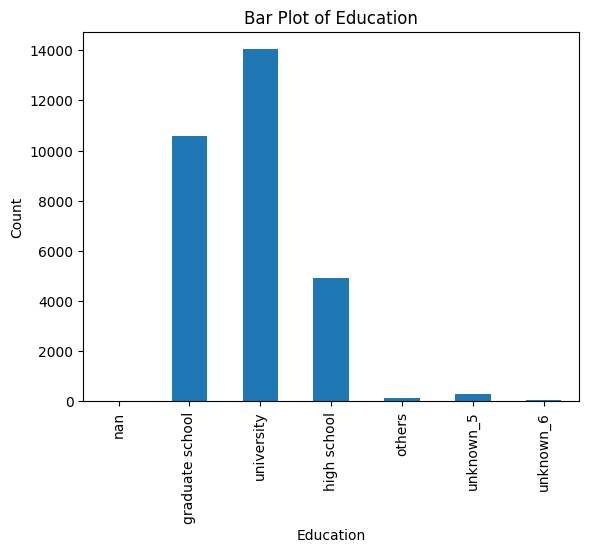

In [8]:
edu_counts =credit_df['EDUCATION'].value_counts().sort_index()
edu_dic = {1:"graduate school", 2:"university", 3:"high school", 4:"others", 5:"unknown_5", 6:"unknown_6"}
edu_counts.index = edu_counts.index.map(edu_dic)
edu_counts.plot.bar()
plt.xlabel('Education')
plt.ylabel('Count')
plt.title('Bar Plot of Education')
plt.show()

Most of the population has an education level equal to or above undergraduate. There may be some NaN values as value 0 is not listed in the data description. In addition, classes 5 and 6 are unknown. This exploration was chosen since education level generally has an impact on income, which could indirectly affect the ability to pay bills on time. Additionally, education level should be ordinal. However, NaN, class 5, and class 6 do not imply any hierarchy. They should not be considered as ordinal data.

pay: (6636, 25)
default: (23364, 25)


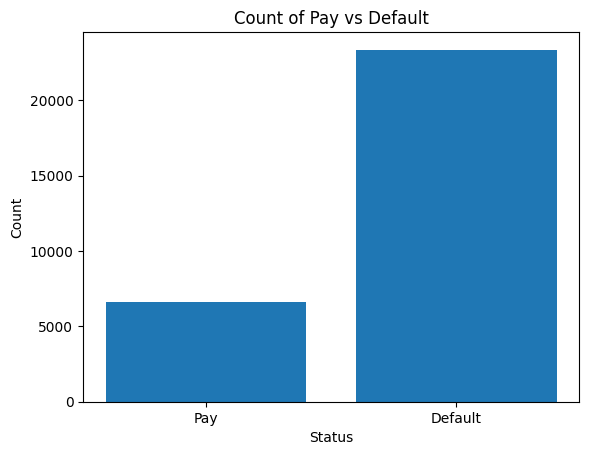

In [9]:
pay = credit_df[credit_df['default.payment.next.month'] == 1]
default = credit_df[credit_df['default.payment.next.month'] == 0]

print("pay: " + str(pay.shape))
print("default: " + str(default.shape))

counts = [pay.shape[0], default.shape[0]]
labels = ['Pay', 'Default']

plt.bar(labels, counts)
plt.xlabel('Status')
plt.ylabel('Count')
plt.title('Count of Pay vs Default')
plt.show()



There is an imbalance between pay and defalult class. We need to be very cautious when choosing the model.

We will look at the impact of the class imbalance on different features. 

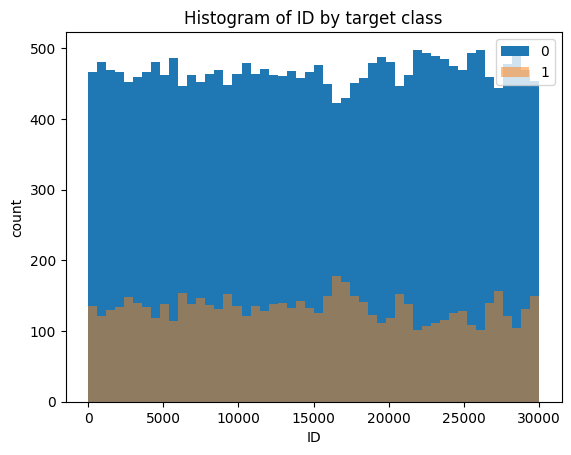

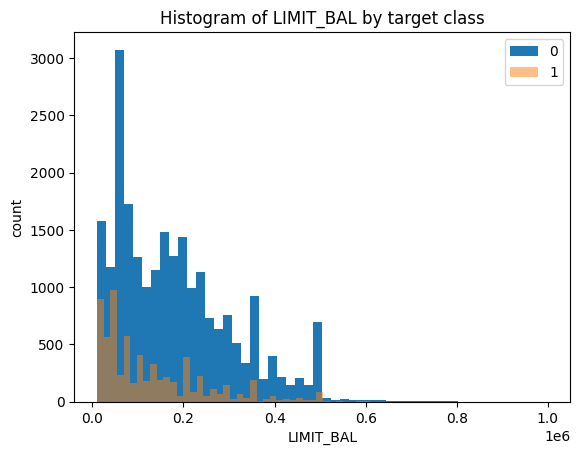

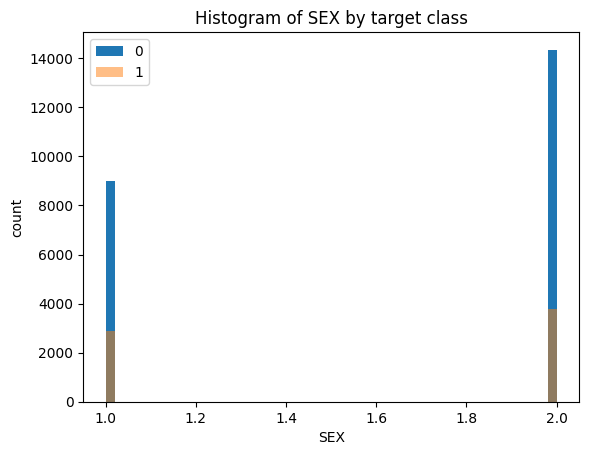

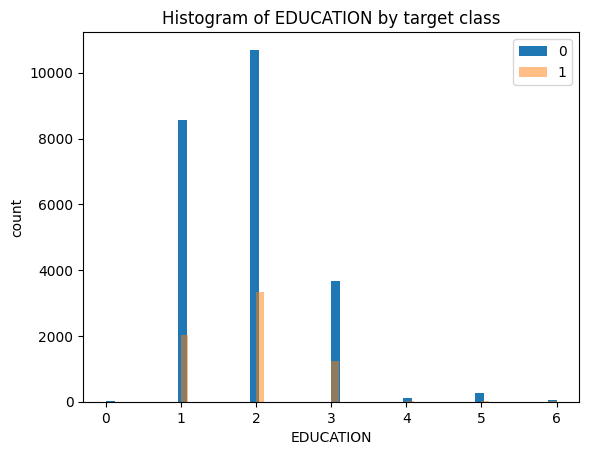

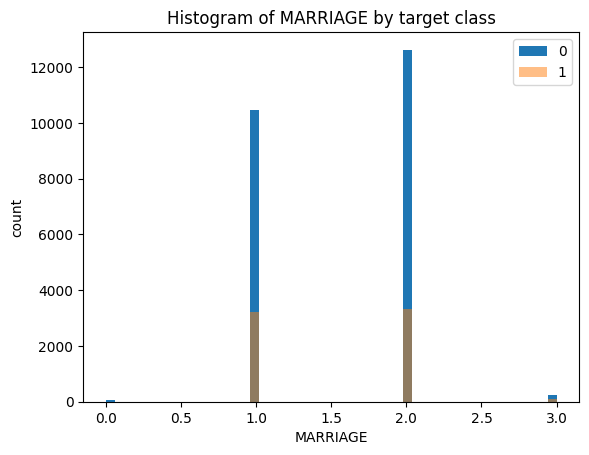

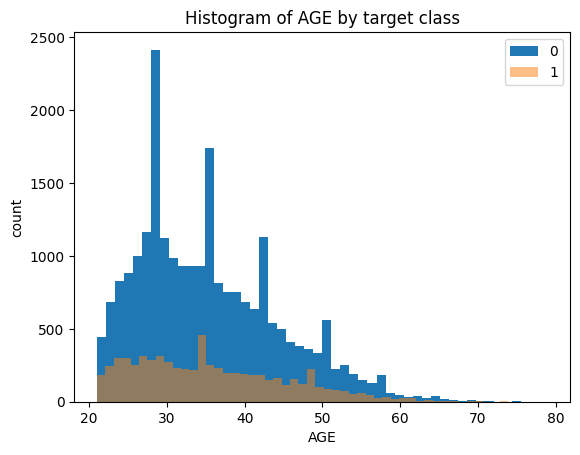

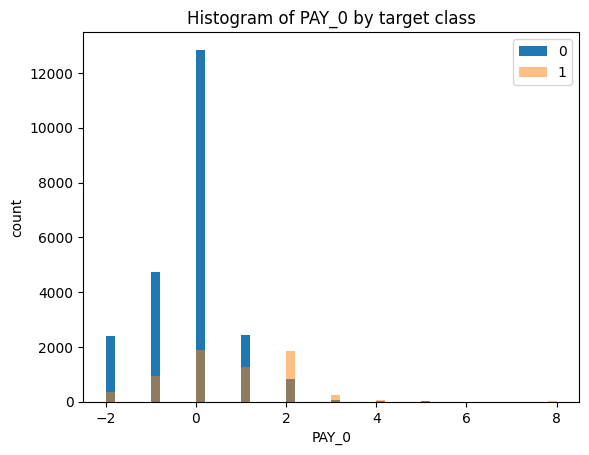

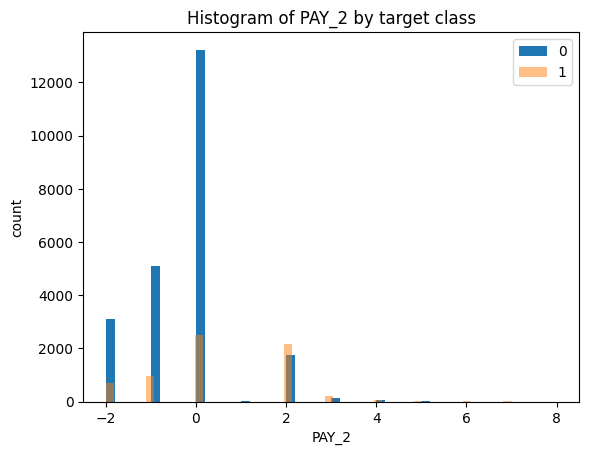

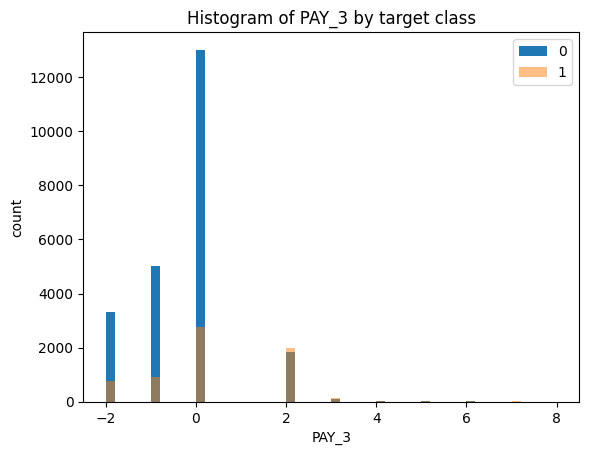

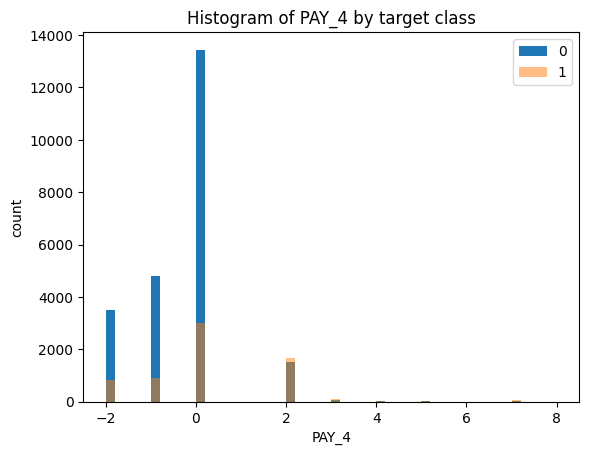

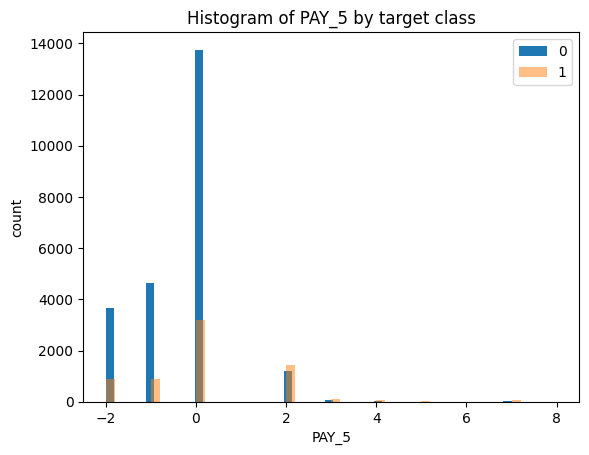

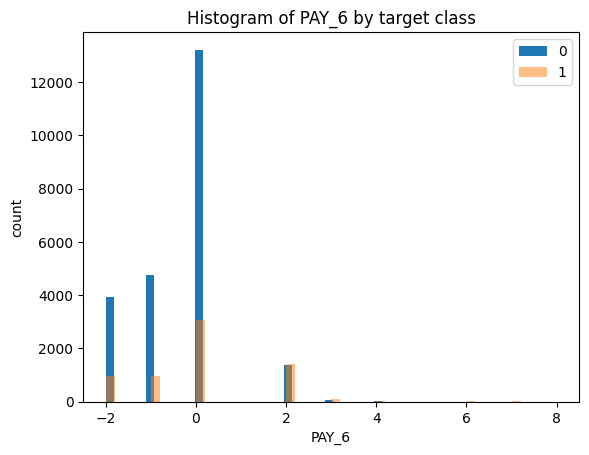

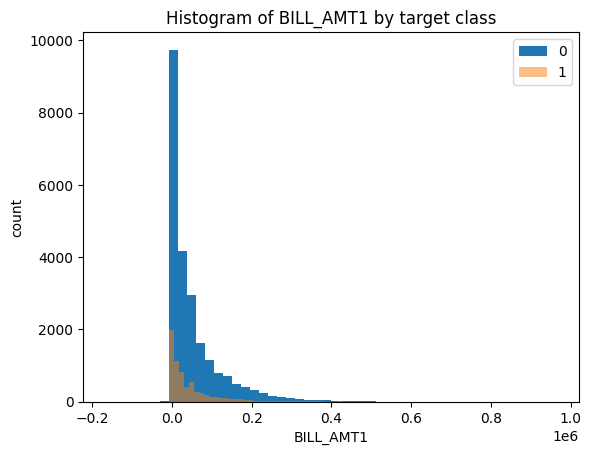

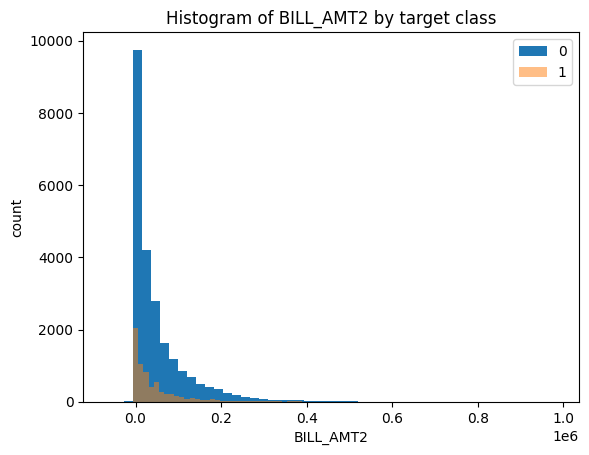

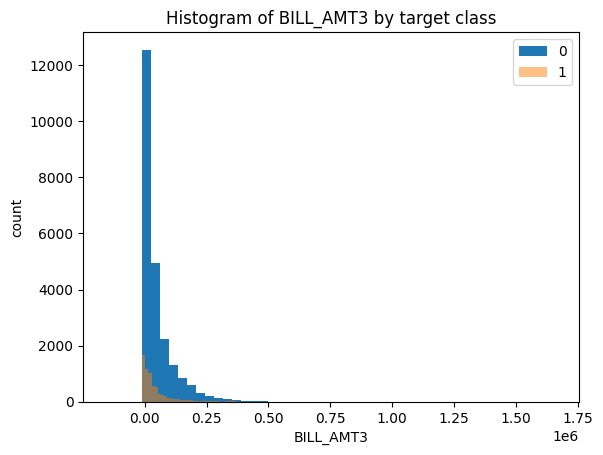

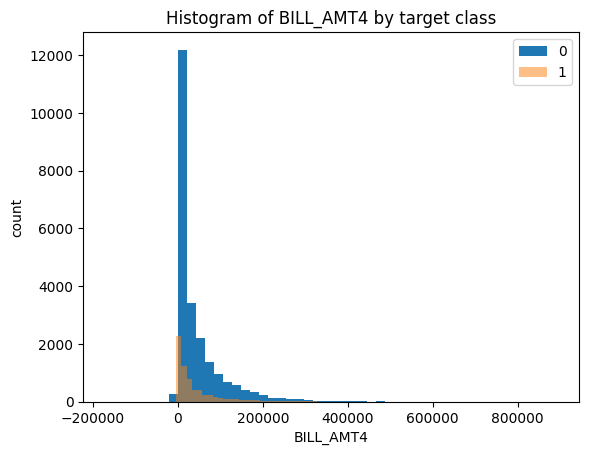

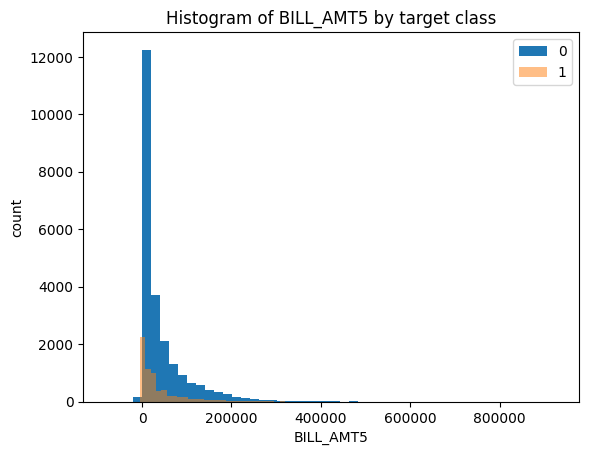

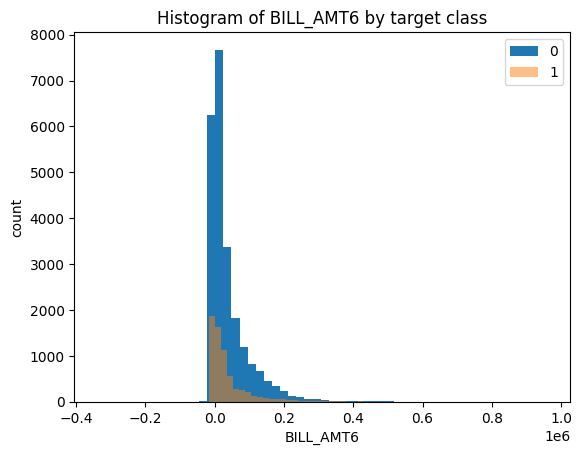

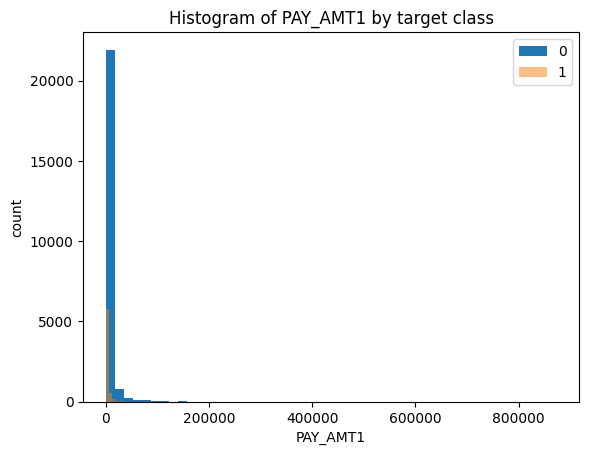

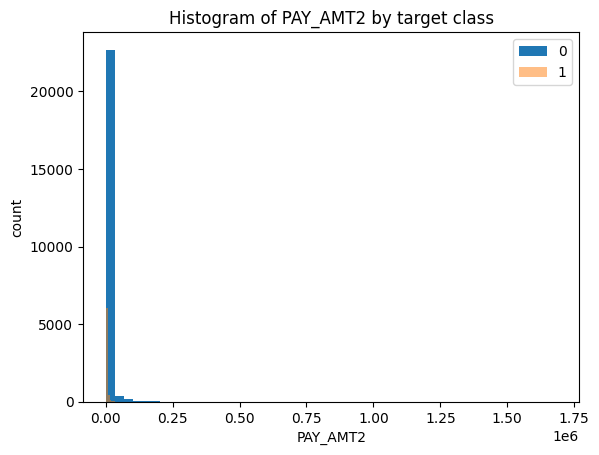

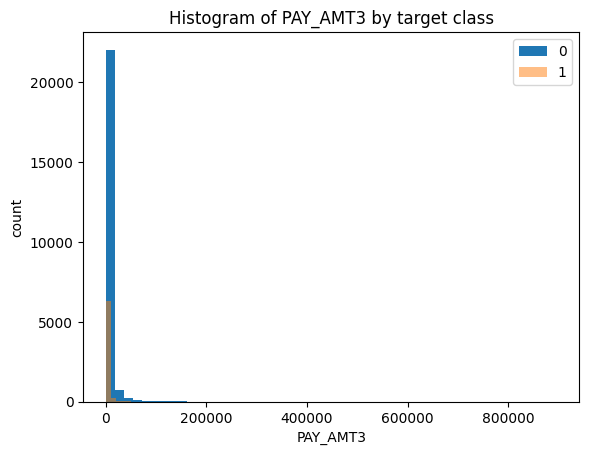

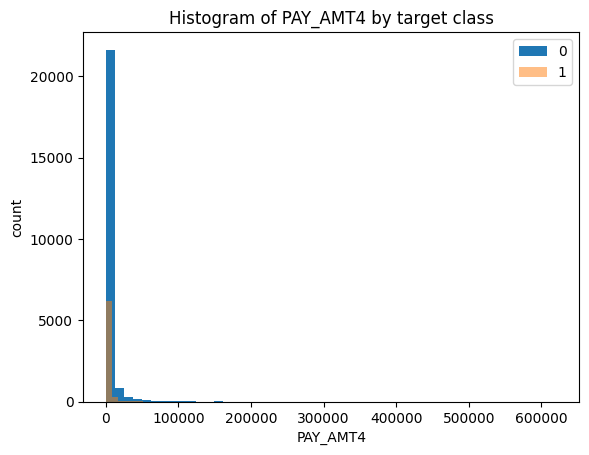

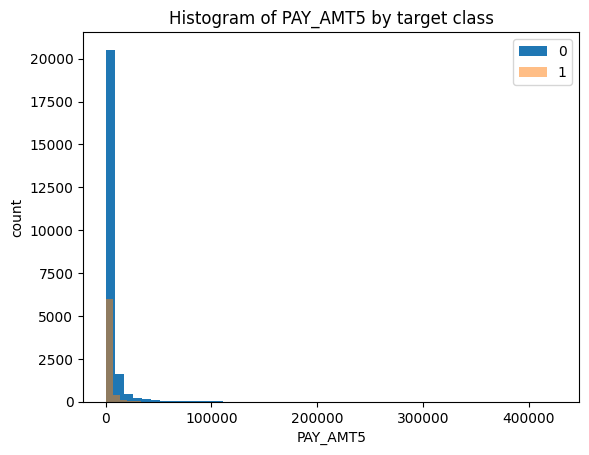

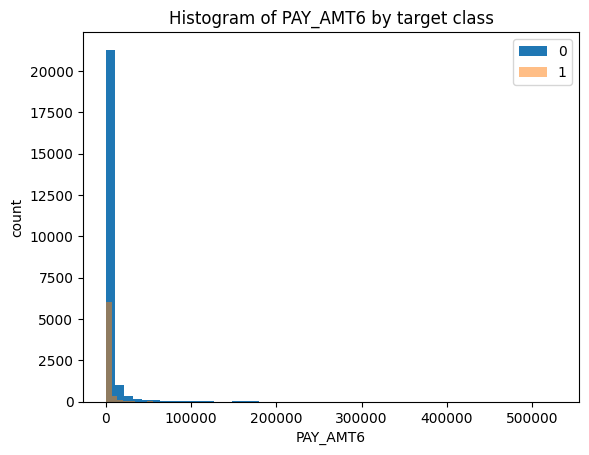

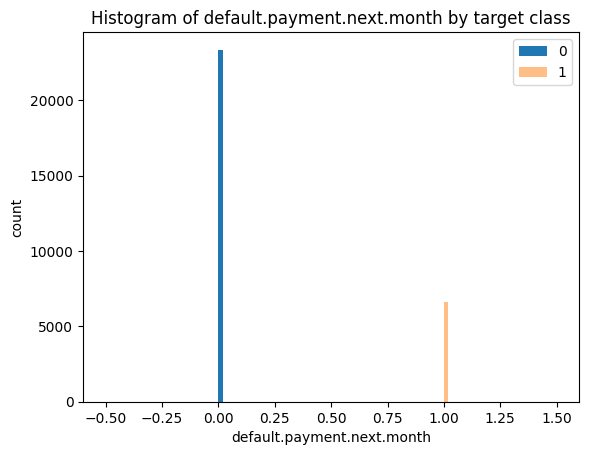

In [10]:
features = []

for column in credit_df.columns:
    features.append(column)

figures = dict()

for feature in features:
    plt.hist(default[feature], alpha=1, bins=50, label="0")
    plt.hist(pay[feature], alpha=0.5, bins=50, label="1")
    plt.legend(loc="best")

    plt.xlabel(feature)
    plt.ylabel("count")
    plt.title(f"Histogram of {feature} by target class")
    plt.show()

### Summary: 

There are a total of 23 features. Although there is no missing values, there are some noise in data due to the lack of documentation. Besides education, which has categories that missed remarks on labels, marriage, pay_0,pay_1... also have similar issues. We need to do some data cleaning to make the data meaningful. 

In addition, demographic and financial data are provided. The monetary values are much larger than values like age, months payments are delayed. The data needed to be standardized. 

Another remark is the classes are imbalanced. The default class has a significantly smaller group size than paying class. We need to keep this in mind when choosing metrics and models.

### Selection of Metrics
Customer that default their bills causes loss to the company revenue. Therefore, it is important for models to have a high recall. However,there is extraneous cost associated with flagged customers: contacting customers that's not actually going to default is a waste of customer service cost and a cost in customer loyalty. Considering the complex effects incurred, it is better to achieve a balance between type I and type II errors, based on the threshold determined by the company.

Because the classes are imbalanced, we will choose F1 score and Recall/Precision score as the metrics. 

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 4. Feature engineering <a name="4"></a>
<hr>
rubric={points:1}

**Your tasks:**

1. Carry out feature engineering. In other words, extract new features relevant for the problem and work with your new feature set in the following exercises. You may have to go back and forth between feature engineering and preprocessing. 

It doesn't seem like there is any applicable feature engineering that would be required to help with this model.


<div class="alert alert-warning">
    
Solution_4
    
</div>

_Points:_ 1

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 5. Preprocessing and transformations <a name="5"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Identify different feature types and the transformations you would apply on each feature type. 
2. Define a column transformer, if necessary. 

<div class="alert alert-warning">
    
Solution_5
    
</div>

_Points:_ 10

### Missing data in Education:
Class 0,4,5,6 do not have meaningful data: 0 can be missing or another level of education that's not specified. Similarly, class 5, 6 are unknown. 4 refers to other. Generally, these classes should not have a higher hierarchy and therefore, I will change these values to 0. 

In [11]:
cond = (credit_df.EDUCATION == 5) | (credit_df.EDUCATION == 6) | (credit_df.EDUCATION == 4)
credit_df.loc[cond, 'EDUCATION'] = 0
credit_df.EDUCATION.value_counts()

EDUCATION
2    14030
1    10585
3     4917
0      468
Name: count, dtype: int64

Similarly, Marriage has category 0 which is not recorded in the data comment. It will be classified as 3, others. 

In [12]:
credit_df.loc[credit_df.MARRIAGE == 0, 'MARRIAGE'] = 3
credit_df.MARRIAGE.value_counts()

MARRIAGE
2    15964
1    13659
3      377
Name: count, dtype: int64

On kaggle, the description for PAY_0: 
PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
Class 0, -2 are not listed. We merge these 2 classes into class -1, pay duly. We do the same thing for Pay_0 to Pay_6.

In [13]:
feats = ['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']
result = []
for feat in feats:
    cond = (credit_df[feat] == -2) | (credit_df[feat] == 0)
    credit_df.loc[cond, feat] = -1
    result.append(credit_df[feat].value_counts())
print(result)

[PAY_0
-1    23182
 1     3688
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: count, dtype: int64, PAY_2
-1    25562
 2     3927
 3      326
 4       99
 1       28
 5       25
 7       20
 6       12
 8        1
Name: count, dtype: int64, PAY_3
-1    25787
 2     3819
 3      240
 4       76
 7       27
 6       23
 5       21
 1        4
 8        3
Name: count, dtype: int64, PAY_4
-1    26490
 2     3159
 3      180
 4       69
 7       58
 5       35
 6        5
 1        2
 8        2
Name: count, dtype: int64, PAY_5
-1    27032
 2     2626
 3      178
 4       84
 7       58
 5       17
 6        4
 8        1
Name: count, dtype: int64, PAY_6
-1    26921
 2     2766
 3      184
 4       49
 7       46
 6       19
 5       13
 8        2
Name: count, dtype: int64]


Additionally, the PAY_0 column is the only one that indexes from 0, when referring to September 2005, compared to the other columns that index from 1. Therefore, I will be renaming it PAY_1 for the sake of consistency.

In [14]:
credit_df = credit_df.rename(columns={'PAY_0': 'PAY_1'});
credit_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,-1,-1,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,-1,-1,-1,-1,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,-1,-1,-1,-1,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,-1,-1,-1,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


Since we've changed the entire dataset, it's necessary to re-split the training and testing data.

In [15]:
X = credit_df.drop(columns = ['default.payment.next.month'])
y = credit_df['default.payment.next.month']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=123
)

print(X.head())
print(y.head())

   ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_1  PAY_2  PAY_3  PAY_4  \
0   1    20000.0    2          2         1   24      2      2     -1     -1   
1   2   120000.0    2          2         2   26     -1      2     -1     -1   
2   3    90000.0    2          2         2   34     -1     -1     -1     -1   
3   4    50000.0    2          2         1   37     -1     -1     -1     -1   
4   5    50000.0    1          2         1   57     -1     -1     -1     -1   

   ...  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
0  ...      689.0        0.0        0.0        0.0       0.0     689.0   
1  ...     2682.0     3272.0     3455.0     3261.0       0.0    1000.0   
2  ...    13559.0    14331.0    14948.0    15549.0    1518.0    1500.0   
3  ...    49291.0    28314.0    28959.0    29547.0    2000.0    2019.0   
4  ...    35835.0    20940.0    19146.0    19131.0    2000.0   36681.0   

   PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  
0       0.0       0.0       0.0     

In [16]:
X_train.MARRIAGE.value_counts()

MARRIAGE
2    11210
1     9527
3      263
Name: count, dtype: int64

Now it's time to build the pipeline:

In [17]:
# classify features, and determine individual preprocessing procedures.
categorical_feats = [
    'MARRIAGE', 
    'EDUCATION'
]

numeric_feats = [
    'LIMIT_BAL',
    'AGE',
    'BILL_AMT1',
    'BILL_AMT2',
    'BILL_AMT3',
    'BILL_AMT4',
    'BILL_AMT5',
    'BILL_AMT6',
    'PAY_AMT1',
    'PAY_AMT2',
    'PAY_AMT3',
    'PAY_AMT4',
    'PAY_AMT5',
    'PAY_AMT6',
    'PAY_1',
    'PAY_2',
    'PAY_3',
    'PAY_4',
    'PAY_5',
    'PAY_6'
]
    
binary_feats = [
    'SEX'
]

drop_features = ['ID']


numeric_transformer = StandardScaler()

categorical_transformer = OneHotEncoder()

binary_transformer = OneHotEncoder(drop="if_binary", dtype=int)

preprocessor = make_column_transformer(
    (numeric_transformer, numeric_feats), 
    (binary_transformer, binary_feats),    
    (categorical_transformer, categorical_feats),
    ("drop", drop_features),
)

In [18]:
# Fit and transform the data
X_transformed = preprocessor.fit_transform(X)  # Assume X is your input DataFrame

# Step 1: Retrieve the column names from each transformer
# Numeric features remain the same
numeric_columns = numeric_feats

# Binary features with one-hot encoding
binary_columns = preprocessor.transformers_[1][1].get_feature_names_out(binary_feats)

# Categorical features with one-hot encoding
categorical_columns = preprocessor.transformers_[2][1].get_feature_names_out(categorical_feats)

# Step 2: Combine all column names
all_columns = list(numeric_columns) + list(binary_columns) + list(categorical_columns)

# Step 3: Create a new DataFrame with these column names
X_transformed_df = pd.DataFrame(X_transformed, columns=all_columns, index=X.index)

In [19]:
X_transformed_df

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_5,PAY_6,SEX_2,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,EDUCATION_0,EDUCATION_1,EDUCATION_2,EDUCATION_3
0,-1.136720,-1.246020,-0.642501,-0.647399,-0.667993,-0.672497,-0.663059,-0.652724,-0.341942,-0.227086,...,-0.319886,-0.327475,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.365981,-1.029047,-0.659219,-0.666747,-0.639254,-0.621636,-0.606229,-0.597966,-0.341942,-0.213588,...,-0.319886,2.656808,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,-0.597202,-0.161156,-0.298560,-0.493899,-0.482408,-0.449730,-0.417188,-0.391630,-0.250292,-0.191887,...,-0.319886,-0.327475,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,-0.905498,0.164303,-0.057491,-0.013293,0.032846,-0.232373,-0.186729,-0.156579,-0.221191,-0.169361,...,-0.319886,-0.327475,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-0.905498,2.334029,-0.578618,-0.611318,-0.161189,-0.346997,-0.348137,-0.331482,-0.221191,1.335034,...,-0.319886,-0.327475,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.404759,0.381275,1.870379,2.018136,2.326690,0.695474,-0.149259,-0.384392,0.171250,0.611048,...,-0.319886,-0.327475,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
29996,-0.134759,0.815221,-0.672786,-0.665299,-0.627430,-0.532924,-0.577691,-0.652724,-0.231032,-0.103955,...,-0.319886,-0.327475,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
29997,-1.059646,0.164303,-0.647227,-0.643830,-0.638158,-0.347961,-0.324517,-0.327687,-0.341942,-0.256990,...,-0.319886,-0.327475,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
29998,-0.674276,0.598248,-0.717982,0.410269,0.422373,0.147844,-0.468063,0.169130,4.844316,-0.109033,...,-0.319886,-0.327475,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


<!-- BEGIN QUESTION -->

## 6. Baseline model <a name="6"></a>
<hr>
rubric={points:2}

**Your tasks:**
1. Try `scikit-learn`'s baseline model and report results.

<div class="alert alert-warning">
    
Solution_6
    
</div>

_Points:_ 2

In [20]:
# from homework 3
results_dict = {}  # dictionary to store all the results
# define the mean_std_cross_val_scores function
def mean_std_cross_val_scores(model, X_train, y_train, **kwargs):
    """
    Returns mean and std of cross validation

    Parameters
    ----------
    model :
        scikit-learn model
    X_train : numpy array or pandas DataFrame
        X in the training data
    y_train :
        y in the training data

    Returns
    ----------
        pandas Series with mean scores from cross_validation
    """

    scores = cross_validate(model, X_train, y_train, **kwargs)

    mean_scores = pd.DataFrame(scores).mean()
    std_scores = pd.DataFrame(scores).std()
    out_col = []

    for i in range(len(mean_scores)):
        out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores[i], std_scores[i])))

    return pd.Series(data=out_col, index=mean_scores.index)

In [21]:
scoring = [
    "f1",
    "recall",
    "accuracy"
]

results_dict = {}

dummy = DummyClassifier(strategy="prior")
pipe = make_pipeline(preprocessor, dummy)
results_dict["dummy"] = mean_std_cross_val_scores(
    pipe, X_train, y_train, cv=5, return_train_score=True, scoring = scoring
)
pd.DataFrame(results_dict)

C:\Users\shuch\AppData\Local\Temp\ipykernel_1232\436530239.py:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores[i], std_scores[i])))


,dummy
fit_time,0.023 (+/- 0.003)
score_time,0.013 (+/- 0.003)
test_f1,0.000 (+/- 0.000)
train_f1,0.000 (+/- 0.000)
test_recall,0.000 (+/- 0.000)
train_recall,0.000 (+/- 0.000)
test_accuracy,0.777 (+/- 0.000)
train_accuracy,0.777 (+/- 0.000)


The dummy classifier has a very low f1 and recall rate. Due to the imbalanced class, the accuracy is high.This indicates that accuracy is not a good metric, f1 is giving a good performance in this imbalanced situation. 

<!-- BEGIN QUESTION -->

## 7. Linear models <a name="7"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Try a linear model as a first real attempt. 
2. Carry out hyperparameter tuning to explore different values for the complexity hyperparameter. 
3. Report cross-validation scores along with standard deviation. 
4. Summarize your results.

<div class="alert alert-warning">
    
Solution_7
    
</div>

_Points:_ 10

The below is based on Lecture 7 Notes. I will try Linear Regression as a first attempt - capturing the train and cross-validation scores.

In [22]:
scores_dict = {
    "alpha": 10.0 ** np.arange(-4, 6, 1),
    "mean_train_scores": list(),
    "mean_cv_scores": list(),
}
for alpha in scores_dict["alpha"]:
    pipe_ridge = make_pipeline(preprocessor, Ridge(alpha=alpha))
    scores = cross_validate(pipe_ridge, X_train, y_train, return_train_score=True, scoring='neg_mean_squared_error')
    scores_dict["mean_train_scores"].append(scores["train_score"].mean())
    scores_dict["mean_cv_scores"].append(scores["test_score"].mean())

results_df = pd.DataFrame(scores_dict)
results_df

,alpha,mean_train_scores,mean_cv_scores
0,0.0001,-0.140231,-0.140696
1,0.0010,-0.140231,-0.140696
2,0.0100,-0.140231,-0.140696
3,0.1000,-0.140231,-0.140696
4,1.0000,-0.140231,-0.140696
5,10.0000,-0.140231,-0.140695
6,100.0000,-0.140239,-0.140694
7,1000.0000,-0.140398,-0.140801
8,10000.0000,-0.142350,-0.142588
9,100000.0000,-0.154985,-0.155043


In [23]:
results_df.describe()

,alpha,mean_train_scores,mean_cv_scores
count,10.000000,10.000000,10.000000
mean,11111.111110,-0.141936,-0.142330
std,31387.262455,0.004633,0.004506
min,0.000100,-0.154985,-0.155043
25%,0.032500,-0.140359,-0.140775
50%,5.500000,-0.140231,-0.140696
75%,775.000000,-0.140231,-0.140696
max,100000.000000,-0.140231,-0.140694


The mean training and cross-validation (CV) scores are stable and nearly identical for low alpha values, suggesting that the model is neither overfitting nor underfitting initially. However, as alpha increases, scores start to decline (with both training and CV scores becoming more negative). This indicates underfitting at high alpha values, where the model fails to capture essential patterns in the data. Regardless, this seems like a poor model choice considering the low accuracies. The negative MSE scores and minimal differences between training and CV scores indicate that Ridge regression is definitely not the right choice for the task. I will now try logistic regression instead.

In [24]:
scores_dict = {
    "C": 10.0 ** np.arange(-4, 6, 1),
    "mean_train_scores": list(),
    "mean_cv_scores": list(),
}
for C in scores_dict["C"]:
    pipe_lr = make_pipeline(preprocessor, LogisticRegression(C=C, class_weight='balanced', max_iter=400))
    scores = cross_validate(pipe_lr, X_train, y_train, return_train_score=True, scoring="f1")
    scores_dict["mean_train_scores"].append(scores["train_score"].mean())
    scores_dict["mean_cv_scores"].append(scores["test_score"].mean())

results_df = pd.DataFrame(scores)
results_df.describe()

,fit_time,score_time,test_score,train_score
count,5.000000,5.000000,5.000000,5.000000
mean,0.097018,0.010182,0.535718,0.535922
std,0.011783,0.001250,0.010666,0.002722
min,0.083220,0.008985,0.519417,0.532691
25%,0.091542,0.009283,0.532803,0.534918
50%,0.091589,0.010089,0.537149,0.535449
75%,0.108914,0.010379,0.541398,0.536422
max,0.109822,0.012171,0.547822,0.540130


Much better now! Training and test f1 scores are close, with both averaging close to 0.53. The small gap between them indicates a well-balanced model that does not seem to overfit or underfit significantly. However, the moderate f1 score implies that while the model captures some useful patterns, it may not fully represent the complexity of the data. Now for some hyperparameter tuning using Grid Search for optimizing C.

In [25]:
pipe_lr = make_pipeline(preprocessor, LogisticRegression(max_iter=1000, class_weight='balanced'))

param_grid = {
    "logisticregression__C": 10.0 ** np.arange(-4, 6, 1)
}

search = GridSearchCV(
    pipe_lr,
    param_grid,
    verbose=1,
    n_jobs=-1,
    return_train_score=True,
    scoring="f1",
)
search.fit(X_train, y_train);
grid_results_df = pd.DataFrame(search.cv_results_)[
    [
        "mean_test_score",
        "mean_train_score",
        "param_logisticregression__C",
        "rank_test_score",
    ]
]
grid_results_df = grid_results_df.sort_values(by="mean_test_score", ascending=False)
grid_results_df

Fitting 5 folds for each of 10 candidates, totalling 50 fits


,mean_test_score,mean_train_score,param_logisticregression__C,rank_test_score
1,0.536527,0.537317,0.0010,1
0,0.536268,0.535746,0.0001,2
4,0.535819,0.535893,1.0000,3
5,0.535768,0.535886,10.0000,4
6,0.535718,0.535922,100.0000,5
7,0.535718,0.535922,1000.0000,5
8,0.535718,0.535922,10000.0000,5
9,0.535718,0.535922,100000.0000,5
2,0.535527,0.535572,0.0100,9
3,0.535488,0.536056,0.1000,10


In [26]:
grid_results_df.describe()

,mean_test_score,mean_train_score,param_logisticregression__C,rank_test_score
count,10.000000,10.000000,10.000000,10.000000
mean,0.535827,0.536016,11111.111110,4.900000
std,0.000323,0.000475,31387.262455,2.806738
min,0.535488,0.535572,0.000100,1.000000
25%,0.535718,0.535887,0.032500,3.250000
50%,0.535718,0.535922,5.500000,5.000000
75%,0.535806,0.535922,775.000000,5.000000
max,0.536527,0.537317,100000.000000,10.000000


The best C value of 0.001 achieves the highest mean test f1 score of 0.5365, and scores decrease slightly for extremely low and high C values. This suggests that, at optimal C, the model avoids overfitting on the training data while also capturing relevant patterns for generalization to new data.

Logistic regression obviously performs much better for classification than linear regression, with mean f1 scores of 0.535827 with a std deviation of 0.000323 on the test set. The f1 score reflects moderate precision and recall but suggests room for improvement.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 8. Different models <a name="8"></a>
<hr>
rubric={points:12}

**Your tasks:**
1. Try at least 3 other models aside from a linear model. One of these models should be a tree-based ensemble model. 
2. Summarize your results in terms of overfitting/underfitting and fit and score times. Can you beat a linear model? 

<div class="alert alert-warning">
    
Solution_8
    
</div>

_Points:_ 12

In [27]:
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline, make_pipeline

import warnings

warnings.simplefilter(action="ignore", category=DeprecationWarning)
warnings.simplefilter(action="ignore", category=UserWarning)

results = {}

In [28]:
# Catboost

pipe_catboost = make_pipeline(
    preprocessor, CatBoostClassifier(verbose=0, random_state=123)
)
results["Catboost"] = mean_std_cross_val_scores(
    pipe_catboost, X_train, y_train, return_train_score=True, scoring = scoring
)

C:\Users\shuch\AppData\Local\Temp\ipykernel_1232\436530239.py:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores[i], std_scores[i])))


In [29]:
# RandomForestClassifier
pipe_rf = make_pipeline(
    preprocessor, RandomForestClassifier(random_state=123, n_jobs=-1)
)

# Fit the model
pipe_rf.fit(X_train, y_train)

# Calculate cross-validation scores with mean and standard deviation
results["Random forests"] = mean_std_cross_val_scores(
    pipe_rf, X_train, y_train, return_train_score=True, scoring = scoring
)

C:\Users\shuch\AppData\Local\Temp\ipykernel_1232\436530239.py:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores[i], std_scores[i])))


In [30]:
# xgboost
pipe_xgb = make_pipeline(
    preprocessor, XGBClassifier(random_state=123, eval_metric="logloss", verbosity=0)
)
results["xgboost"] = mean_std_cross_val_scores(
    pipe_catboost, X_train, y_train, return_train_score=True, scoring = scoring
)

C:\Users\shuch\AppData\Local\Temp\ipykernel_1232\436530239.py:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores[i], std_scores[i])))


In [31]:
pd.DataFrame(results).T

,fit_time,score_time,test_f1,train_f1,test_recall,train_recall,test_accuracy,train_accuracy
Catboost,11.878 (+/- 1.007),0.055 (+/- 0.006),0.475 (+/- 0.013),0.606 (+/- 0.004),0.372 (+/- 0.012),0.481 (+/- 0.004),0.817 (+/- 0.005),0.860 (+/- 0.001)
Random forests,1.430 (+/- 0.103),0.063 (+/- 0.014),0.471 (+/- 0.013),0.999 (+/- 0.000),0.371 (+/- 0.011),0.998 (+/- 0.000),0.814 (+/- 0.005),0.999 (+/- 0.000)
xgboost,11.310 (+/- 0.376),0.075 (+/- 0.017),0.475 (+/- 0.013),0.606 (+/- 0.004),0.372 (+/- 0.012),0.481 (+/- 0.004),0.817 (+/- 0.005),0.860 (+/- 0.001)


Based on the above data, it seems like both Catboost and XGboost achieve balanced scores with the test and train F1 and accuracy values closer together. This suggests that they are less prone to overfitting. However, the test F1 scores are still relatively low, indicating some degree of underfitting. These models could benefit from further tuning.

On the other hand, the Random Forests model demonstrates significant overfitting. It has near perfect scores on the training set (train F1, recall near 1), but lower test scores (0.472 vs 0.477). This indicates that the model may capture noise or patterns specific to the training data rather than general trends. 

Overall, Random Forest has the fastest training time at approximately 1.25 seconds, followed by XGboost and then Catboost, which is the slowest. Random Forest’s simplicity allows it to fit the data faster, but this comes with the drawback of overfitting. For scoring time, all models hwere relatively fast, with Random Forest scoring slightly faster than XGboost, and Catboost being considerably slower. 

In comparison to the Logistic Regression model, these models performed worse in terms of overall test scores. Logistic regression achieved a mean test score around 0.536, which, though seemingly modest, is higher than the test F1 scores for Catboost, Random Forest, and XGboost. Logistic regression also shows minimal overfitting or underfitting, with similar train and test scores. Lastly, Logistic regression offers the advantage of quick fit and score times, even when compared to faster models like Random Forest.



<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 9. Feature selection <a name="9"></a>
<hr>
rubric={points:2}

**Your tasks:**

Make some attempts to select relevant features. You may try `RFECV` or forward selection for this. Do the results improve with feature selection? Summarize your results. If you see improvements in the results, keep feature selection in your pipeline. If not, you may abandon it in the next exercises. 

<div class="alert alert-warning">
    
Solution_9
    
</div>

_Points:_ 2

_Type your answer here, replacing this text._

In [32]:
...

Ellipsis

In [33]:
...

Ellipsis

In [34]:
...

Ellipsis

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 10. Hyperparameter optimization <a name="10"></a>
<hr>
rubric={points:10}

**Your tasks:**

Make some attempts to optimize hyperparameters for the models you've tried and summarize your results. In at least one case you should be optimizing multiple hyperparameters for a single model. You may use `sklearn`'s methods for hyperparameter optimization or fancier Bayesian optimization methods. 
  - [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)   
  - [RandomizedSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)
  - [scikit-optimize](https://github.com/scikit-optimize/scikit-optimize) 

<div class="alert alert-warning">
    
Solution_10
    
</div>

_Points:_ 10

I am going to attempt to optimize multiple hyperparameters for the XGboost model as it had a higher test score than Random Forest and is less prone to overfitting. Although it performed almost identically to Catboost, it was also a lot quicker.

In [35]:
pipe_xgb = make_pipeline(
    preprocessor, XGBClassifier(random_state=123, eval_metric="logloss", verbosity=0)
)
param_grid = {
    "xgbclassifier__n_estimators": [100, 200, 300],
    "xgbclassifier__max_depth": [3, 5, 7]
}
xgb_grid_search = GridSearchCV(
    pipe_xgb, 
    param_grid, 
    cv=5, 
    n_jobs=-1, 
    return_train_score=True,
    scoring = "f1",
)

xgb_grid_search.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('standardscaler',
                                                                         StandardScaler(),
                                                                         ['LIMIT_BAL',
                                                                          'AGE',
                                                                          'BILL_AMT1',
                                                                          'BILL_AMT2',
                                                                          'BILL_AMT3',
                                                                          'BILL_AMT4',
                                                                          'BILL_AMT5',
                                                                          'BILL_AMT6',
                                                                          'PAY_AMT1',
                                                                          'PAY_AMT2',
                                                                          'PAY_AMT3',
                                                                          'PAY_AMT4',
                                                                          'PAY_AMT5',
                                                                          'PAY_AMT6',
                                                                          'PAY_1',
                                                                          'PAY_2',
                                                                          'PAY_3',
                                                                          'PAY_4',
                                                                          'PAY_5',
                                                                          'PAY_6']),
                                                                        ('onehotenc...
                                                      max_cat_to_onehot=None,
                                                      max_delta_step=None,
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=123, ...))]),
             n_jobs=-1,
             param_grid={'xgbclassifier__max_depth': [3, 5, 7],
                         'xgbclassifier__n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='f1')

In [36]:
xgb_grid_search.best_params_

{'xgbclassifier__max_depth': 3, 'xgbclassifier__n_estimators': 100}

In [37]:
xgb_grid_search.best_score_

0.4740290390875259

Below is a similar optimization for the Random Forest model using another optimization method.

In [38]:
from sklearn.model_selection import RandomizedSearchCV

pipe_rf = make_pipeline(
    preprocessor, RandomForestClassifier(random_state=123, n_jobs=-1)
)

param_grid = {
    "randomforestclassifier__n_estimators": [1, 5, 10, 25, 50, 100, 200]
}

random_search_rf = RandomizedSearchCV(
    pipe_rf, 
    param_distributions = param_grid, 
    cv=5, 
    n_jobs=-1, 
    return_train_score=True,
    scoring = "f1"
)
random_search_rf.fit(X_train, y_train)
random_search_rf.best_score_


0.4747246551779485

In [39]:
random_search_rf.best_params_

{'randomforestclassifier__n_estimators': 200}

As evident above, hyperparameter tuning on the Random Forests model improved the test accuracy considering the slight improvement in f1 score from 0.472 to 0.476 (almost at the same level as XGboost and Catboost). However, with optimization of multiple parameters on the XGboost model, the f1 score actually performed worse (0.477 vs 0.474).

<!-- BEGIN QUESTION -->

## 11. Interpretation and feature importances <a name="1"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Use the methods we saw in class (e.g., `shap`) (or any other methods of your choice) to examine the most important features of one of the non-linear models. 
2. Summarize your observations. 

<div class="alert alert-warning">
    
Solution_11
    
</div>

_Points:_ 10

_Type your answer here, replacing this text._

In [40]:
best_pipe_lr = make_pipeline(preprocessor, LogisticRegression(max_iter=1000, class_weight='balanced', C = 0.001))
best_pipe_lr.fit(X_train, y_train)

coeffs = best_pipe_lr.named_steps["logisticregression"].coef_.flatten()

In [41]:
preprocessor.named_transformers_


{'standardscaler': StandardScaler(),
 'onehotencoder-1': OneHotEncoder(drop='if_binary', dtype=<class 'int'>),
 'onehotencoder-2': OneHotEncoder(),
 'drop': 'drop'}

In [42]:
new_columns = (numeric_feats + binary_feats + 
               list(preprocessor.named_transformers_["onehotencoder-2"].get_feature_names_out(categorical_feats))
              )

In [43]:
features = pd.DataFrame(coeffs, index = new_columns, columns=["Coefficient"])
features.sort_values(by = "Coefficient", ascending=False)

,Coefficient
PAY_1,0.481627
PAY_3,0.130797
PAY_2,0.119236
PAY_6,0.114850
PAY_5,0.096096
PAY_4,0.088163
MARRIAGE_1,0.045887
AGE,0.027291
EDUCATION_3,0.017695
BILL_AMT3,0.017571


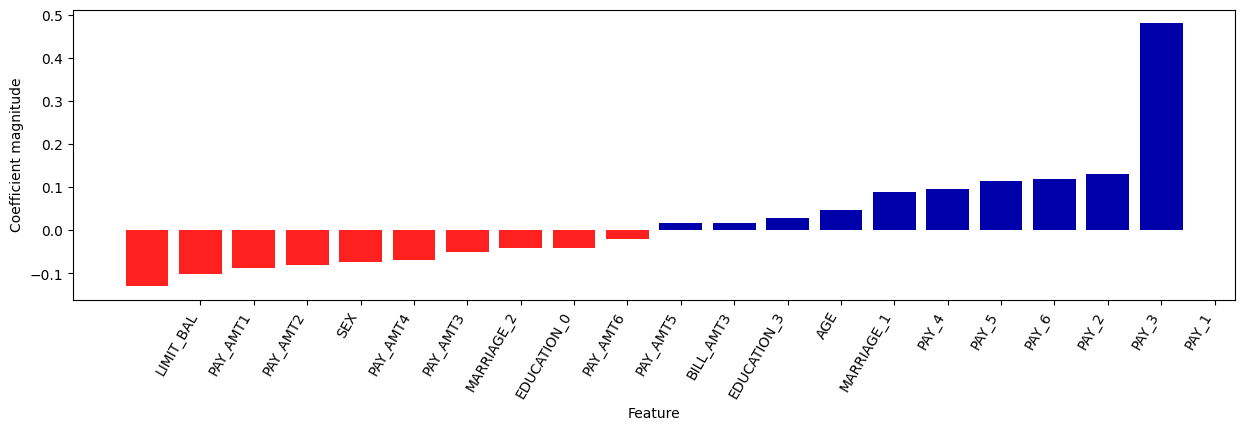

In [44]:
import mglearn

mglearn.tools.visualize_coefficients(coeffs, new_columns, n_top_features=10)

Based on the above, we can see that features like PAY_1, PAY_3, and PAY_2 have the highest positive coefficients, indicating they are strongly associated with the target class (indicating higher credit risk). This shows that recent payment status is highly predictive.

On the other hand, features such as LIMIT_BAL, PAY_AMT1, and PAY_AMT2 have the most negative coefficients, suggesting they are inversely associated with the target class. Higher credit limits and recent payment amounts indicate lower credit risk.

<!-- BEGIN QUESTION -->

## 12. Results on the test set <a name="12"></a>
<hr>

rubric={points:10}

**Your tasks:**

1. Try your best performing model on the test data and report test scores. 
2. Do the test scores agree with the validation scores from before? To what extent do you trust your results? Do you think you've had issues with optimization bias? 
3. Take one or two test predictions and explain these individual predictions (e.g., with SHAP force plots).  

<div class="alert alert-warning">
    
Solution_12
    
</div>

_Points:_ 10

In [45]:
from sklearn.metrics import classification_report

# Assuming pipe_best_catboost is your trained pipeline
best_pipe_lr.fit(X_train, y_train)

# Predict on the test data
y_pred = best_pipe_lr.predict(X_test)

# Evaluate the model performance

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.82      0.85      7052
           1       0.47      0.56      0.51      1948

    accuracy                           0.77      9000
   macro avg       0.67      0.69      0.68      9000
weighted avg       0.78      0.77      0.77      9000



The f1 for the positive class is 0.51, which is slightly lower than the test score for the training dataset, 0.53. This is expected, and the gird search of the parameter has tried other levels, such as 0.0001. So I am not worried about the optimization bias, it's not likely to overfit or underfit. 

In [46]:
import shap
shap.initjs()

# Fit the model
best_pipe_lr.fit(X_train, y_train)

# Select a sample and transform it
X_test_sample = X_test.iloc[:2]  # Select the first two rows
X_test_sample_transformed = preprocessor.transform(X_test_sample)

# Define column names based on transformers used
# Numeric columns remain the same
numeric_columns = numeric_feats

# Binary features with one-hot encoding
binary_columns = preprocessor.transformers_[1][1].get_feature_names_out(binary_feats)

# Categorical features with one-hot encoding
categorical_columns = preprocessor.transformers_[2][1].get_feature_names_out(categorical_feats)

# Combine all column names
all_columns = list(numeric_columns) + list(binary_columns) + list(categorical_columns)

# Create DataFrame with column names for the transformed sample
X_test_sample_enc = pd.DataFrame(X_test_sample_transformed, columns=all_columns, index=X_test_sample.index)

# Use LinearExplainer for the logistic regression model
shap_explainer = shap.LinearExplainer(best_pipe_lr.named_steps["logisticregression"], X_test_sample_enc)
shap_values = shap_explainer.shap_values(X_test_sample_enc)

# Visualize the explanation for the first prediction
shap.force_plot(
    shap_explainer.expected_value,
    shap_values[0],  # Adjust indexing to match shap_values structure
    X_test_sample_enc.iloc[0, :]  # Now with proper column names
)


SHAP shows that the model gives a prediction of -0.64, the log-odds of the regression model. Translated to probability , it's about 0.35. Since it's < 0.5, the threshold, it is a negative class. Each block in the chart shows its contribution to the deision. The high limit balance suggest it's likely to default, but many other factors, include the pay_AMT4, age, and Marrige shows it's not likely to default the payment. 

<!-- BEGIN QUESTION -->

## 13. Summary of results <a name="13"></a>
<hr>
rubric={points:12}

Imagine that you want to present the summary of these results to your boss and co-workers. 

**Your tasks:**

1. Create a table summarizing important results. 
2. Write concluding remarks.
3. Discuss other ideas that you did not try but could potentially improve the performance/interpretability . 
3. Report your final test score along with the metric you used at the top of this notebook in the [Submission instructions section](#si).

<div class="alert alert-warning">
    
Solution_13
    
</div>

_Points:_ 12

In [47]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.82      0.85      7052
           1       0.47      0.56      0.51      1948

    accuracy                           0.77      9000
   macro avg       0.67      0.69      0.68      9000
weighted avg       0.78      0.77      0.77      9000



We analysed data concerning the likelyhood of customers defaulting their credit card bills. Exploratory analysis shows although there is no missing values, some informations needed to be reorganized. In addition, the data was imbalanced. To account for this sitution, we choose f1 as the scoring indicator.

We cleaned up the data and set the pipeline to test a few different models. Firstly we tried some linear models, but the performance is not great. We then tried a few more complex models. Although they are more complex, the test score f1, is not higher. They are at ~0.47 level. On the contray, the logisticregression, at its best, have a f1 score of 0.53.

We did a few randomrized grid search to get slightly better results for all models, and some feature selection to improve the result. They are helpful, but not much. 

Finaly we did some analysis to understand how the model arrive it's conclusion. Some features, such as the payment status in few months before the due date, are strongly related to customers defaulting the bill. On the other hand, the amount of payment to credit card bills are negatively related to the default. This also agrees with our common sense. If we pay a big amount of money to set the bills, we generally have a good cash flow, and hence less likely to default. Other indirect features, such as age and marriage, also show some relation to customers likelyhood to default. 

### Ways to improve performance/interpretability:

- Research and collect features that should play a role in whether payments would be defaulted
- Do some feature engineering to give a better input to the models.
- Improve more hyperparameters in the grid search, and run it in more powerful computers to fine tune more advanced models like catboost. 

<br><br>

<!-- BEGIN QUESTION -->

## 14. Your takeaway <a name="15"></a>
<hr>
rubric={points:2}

**Your tasks:**

What is your biggest takeaway from the supervised machine learning material we have learned so far? Please write thoughtful answers.  

<div class="alert alert-warning">
    
Solution_14
    
</div>

_Points:_ 2

Machine learning, as complicated as it is under the hood, is a rule based system, involving a lot of statistics. Statistics aggregates data but it can also be misleading. It is important to understand the task and make good decisions on the best metrices and model to make good predictions.

There are many tools we can use to influence the model, and intepret its behavior. This can help us to do some fact check and help us see how we are doing, which helps us decide what to do next in the process.

**PLEASE READ BEFORE YOU SUBMIT:** 

When you are ready to submit your assignment do the following:

1. Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from "1" will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
4. Upload the assignment using Gradescope's drag and drop tool. Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission. 
5. Make sure that the plots and output are rendered properly in your submitted file. If the .ipynb file is too big and doesn't render on Gradescope, also upload a pdf or html in addition to the .ipynb so that the TAs can view your submission on Gradescope. 

This was a tricky one but you did it! 

![](img/eva-well-done.png)